# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


The first question we are trying to answer is that if temperature of the given data set is normally distributed. 

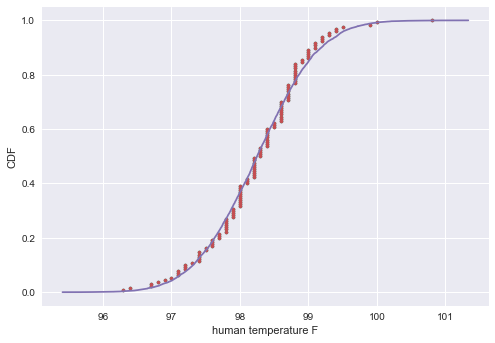

In [14]:
def ecdf(data):
    #compute ECDF of one-dimensional array of measurements
    n =len(data)
    #x data of ECDF
    x = np.sort(data)
    #y data of ECDF
    y = np.arange(1, n+1)/n
    return x, y

mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
samples = np.random.normal(mean, std, 10000)
x,y = ecdf(df['temperature'])
x_sample,y_sample = ecdf(samples)

sns.set()
plt.plot(x,y,marker='.', linestyle='none')
plt.plot(x_sample, y_sample)
plt.xlabel('human temperature F')
plt.ylabel('CDF')
plt.show()

By plotting the ECDF of normally distributed sampling data with the ECDF of emperical temperate data, the plot shows clearly that temperature data overlaid on top of the sampling data, which indicates that temperature data is normally distributed as well.

The second question we are trying to answer is that if the sample size is large, or are the observations independent? 

mean of observations =  98.24923076923078
95% confidence interval =  [ 98.12382692  98.37538462]


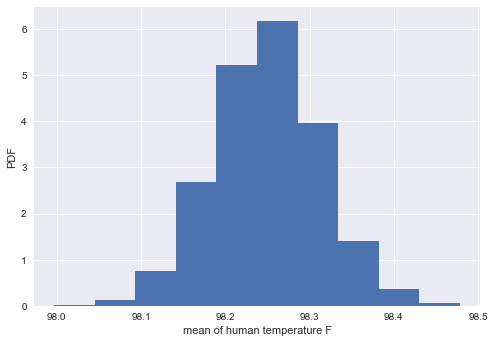

In [25]:
def bootstrap_replicate(data, func):
    bs_samples = np.random.choice(data, len(data))
    return func(bs_samples)

def draw_bs_replicates(data, func, size):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate(data, func)
    return bs_replicates

bs_temp_replicates = draw_bs_replicates(df['temperature'], np.mean, 10000)

conf_inte = np.percentile(bs_temp_replicates, [2.5, 97.5])

print('mean of observations = ', np.mean(df['temperature']))
print('95% confidence interval = ', conf_inte)
plt.hist(bs_temp_replicates, bins=10, normed=True)
plt.xlabel('mean of human temperature F')
plt.ylabel('PDF')
plt.show()

In order to check if the observations of temperature data are independent or not, we set up a statistical test for the mean of human temperature by bootstraping confidence intervals with 10000 replicates. The histgram shows that the 95% confidence interval lands perfectly for the mean of observations, which indicates that those observations are independent.

The third question we are trying to answer is that is the true population mean really 98.6 degrees F? 

Because we need to compare one data set of human temperature with a single number the human temperature population mean, we are choosing one-sample test. And we will use t score instead of z score, because that we don't know the population standard deviation, but we do know the population mean. The question is transformed into a null hypothesis: the true mean of the data set is actually the population mean 98.6 degrees F. We will shift the data with population mean, calculate the t score, and compute p-value to test the null hypothesis.

In [35]:
population_mean = 98.6
sample_mean = np.mean(df['temperature'])
sample_std = np.std(df['temperature'])
sample_standard_error = sample_std/np.sqrt(len(df['temperature']))

print('sample mean = ', sample_mean)
print('sample std = ', sample_std)
print('sample standard error = ', sample_standard_error)

temp_shifted = df['temperature'] - sample_mean + population_mean

def t_score(data, population_mean=98.6):
    return (np.mean(data) - population_mean)/(np.std(data)/np.sqrt(len(data)))
                                             
bs_replicates_t = draw_bs_replicates(temp_shifted, t_score, 10000)                                               

sample_t_score = (sample_mean - population_mean)/sample_standard_error
print('sample t_score = ',sample_t_score)

p_value_t = np.sum(bs_replicates_t <= sample_t_score)/10000   

print('p value of t test = ', p_value_t)

sample t_score =  -5.47592520208
p_value of t test =  0.0


T score is a very small negative number, which is strongly against the null hypothesis. A Zero p value of t test rejects the null hypothesis and accepts the alternative hypothesis, which is the mean of human body temperature is lower than 98.6 degrees F.

Since the sample size is over 30, z-test is also applicable. We are going to rerun the entire test again with z score as the test statistics. 

In [36]:
def z_score(data, population_mean=98.6):
    return (np.mean(data) - population_mean)/np.std(data)

bs_replicates_z = draw_bs_replicates(temp_shifted, z_score, 10000)

sample_z_score = (sample_mean - population_mean)/sample_std
print('sample z_score = ', sample_z_score)

p_value_z = np.sum(bs_replicates_z <= sample_z_score)/10000

print('p value of z test = ', p_value_z)

sample z_score =  -0.48027041116080765
p_value of z test =  0.0


This round, z score is relative close to 0, which is not strongly against the null hypothesis. But the Zero p value of z test rejects the null hypothesis and accepts the alternative hypothesis, which is the mean of human body temperature is lower than 98.6 degree F. Even though, both t test and z test draw the same conclusion due to the Zero p values, t test is much better to reject the null hypothesis than z test.

The fourth question we are trying to answer is if we rerun both t test and z test with a smaller sample, such as 10 observations, what kind of results we will get.

In [40]:
population_mean = 98.6
sample_10 = np.random.choice(df['temperature'], 10)
sample_mean_10 = np.mean(sample_10)
sample_std_10 = np.std(sample_10)
sample_standard_error_10 = sample_std_10/np.sqrt(10)

print('sample mean = ', sample_mean_10)
print('sample std = ', sample_std_10)
print('sample std error = ', sample_standard_error_10)

temp_shifted_10 = sample_10 - sample_mean_10 + population_mean

bs_replicates_t_10 = draw_bs_replicates(temp_shifted_10, t_score, 10000)

sample_t_score_10 = (sample_mean_10 - population_mean) / sample_standard_error_10
print('10 samples t_score = ', sample_t_score_10)

p_value_t_10 = np.sum(bs_replicates_t_10 <= sample_t_score_10)/10000
print('10 samples p value of t test = ', p_value_t_10)

bs_replicates_z_10 = draw_bs_replicates(temp_shifted_10, z_score, 10000)

sample_z_score_10 = (sample_mean_10 - population_mean) / sample_std_10
print('10 samples z_score = ', sample_z_score_10)

p_value_z_10 = np.sum(bs_replicates_z_10 <= sample_z_score_10)/10000
print('10 samples p value of z test = ', p_value_z_10)

mean =  98.21
std =  0.766093989012
std error =  0.242260190704
10 samples t_score =  -1.60983939981
10 samples p value of t test =  0.0361
10 samples z_score =  -0.509075917047
10 samples p value of z test =  0.0384


After running the same boostrapping one-sample test with 10 data samples, the t_score is much smaller than z_score, which is better against the null hypothesis than z_score. So t test is the right choice for smaller samples. Even though we come to the same conclusion of testing the null hypothesis as the large data sample, we notice that p values of both tests are getting larger than the p values of last tests, which means when we have smaller data samples, p value becomes weaker to reject the null hypothesis. So a larger data set is crucial for our hypothesis test.

The fifth question we are trying to answer is at what temperature we should start considering someone's temperature is abnormal?

In [56]:
print('sample mean = ', sample_mean)
print('sample std = ', sample_std)
print('sample sample_standard_error = ', sample_standard_error)

critical_val = 1.96
print('for confidence level 95%, the critical value is = ', critical_val)
margin_error = critical_val*sample_standard_error
print('sample margin error = ', margin_error)

normal_temp_up = sample_mean + margin_error
normal_temp_low = sample_mean - margin_error
print('95% time the human temperature should fall in to ', normal_temp_up, " and ", normal_temp_low)

sample mean =  98.24923076923078
sample std =  0.7303577789050377
sample sample_standard_error =  0.0640566146952
for confidence level 95%, the critical value is =  1.96
sample margin error =  0.125550964803
95% time the human temperature should fall in to  98.374781734  and  98.1236798044


Given the data sample we have, for any human temperature that is either above 98.37 degrees F or below 98.12 degrees F, we should consider it abnormal.

The last question we are trying to answer is that is there any significant difference between males and females in normal temperature?

Since we need to compare two sets of data, male body temperature and female body temperature, we are going to do a two-sample test. Our null hypothesis is that the means of male body temperature and female body temperature are the same. This time we are using permutation sampling to perform the hypothesis test.

In [75]:
male_indices = df['gender'] == 'M'
female_indices = df['gender'] == 'F'

male_temp = df.loc[male_indices, 'temperature']
female_temp = df.loc[female_indices, 'temperature']

def permutation_sample(data1, data2):
    
    data = np.concatenate((data1, data2))
    
    permuated_data = np.random.permutation(data)
    
    perm_sample_1 = permuated_data[:len(data1)]
    perm_sample_2 = permuated_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data1, data2,func, size=1):
    
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data1, data2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates

def diff_means(data1, data2):
    diff = np.mean(data1) - np.mean(data2)
    return diff

empirical_diff_means = diff_means(male_temp, female_temp)

perm_replicates = draw_perm_reps(male_temp, female_temp, diff_means, size=10000)

p = np.sum(perm_replicates >= empirical_diff_means)/10000
print('p-value = ', p)


p-value =  0.989


The high p value failed to reject the null hypothesis, so there is no significant difference between male and female in normal temperature.

Going back to the original question, based on the data given in this exercise with both t test and z test, 37 C or 98.6 F dosen't seem hold as the true population mean of human body temperature statistically. Our data samples are large and independent, so both t and z tests are applicable. But when the sample size gets too small, t test is best choice for the statistical test. Based on the margin errors calcuated based on 95% confidence interval, the normal human temperature range is 98.12 and 98.37 , and any temperature outside the normal range should be considered abnormal. There is no significant difference between male and female in normal temperature based on the permuation test. 